# Netflix Dataset Analysis

## Project Overview
This notebook analyzes Netflix's content catalog to uncover trends in content distribution,
identify popular genres, and provide strategic insights for content expansion.

**Dataset**
- Source: the CSV you uploaded (`Netflix Dataset.csv`).
- Problem statement and objectives are available in the provided project doc.

### Objectives:
1. Analyze the distribution of Movies vs. TV Shows over the years
2. Identify the most common genres and their popularity trends
3. Compare country-wise contributions to Netflix's catalog


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [3]:
df = pd.read_csv("Netflix Dataset.csv")

In [4]:
print("Dataset Shape:", df.shape)
print("First Few Rows:")
df.head()

Dataset Shape: (7789, 11)
First Few Rows:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Exploration

In [5]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
print("\nColumn Names and Types:")
df.dtypes


Column Names and Types:


Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [7]:
print("\nDataset Statistics:")
df.describe(include='all').T


Dataset Statistics:


,count,unique,top,freq
Show_Id,7789,7787,s684,2
Category,7789,2,Movie,5379
Title,7789,7787,Backfire,2
Director,5401,4050,"Raúl Campos, Jan Suter",18
Cast,7071,6831,David Attenborough,18
Country,7282,681,United States,2556
Release_Date,7779,1565,"January 1, 2020",118
Rating,7782,14,TV-MA,2865
Duration,7789,216,1 Season,1608
Type,7789,492,Documentaries,334


In [8]:
print("\nMissing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data.to_string(index=False))


Missing Values Analysis:
      Column  Missing_Count  Missing_Percentage
    Director           2388               30.66
        Cast            718                9.22
     Country            507                6.51
Release_Date             10                0.13
      Rating              7                0.09


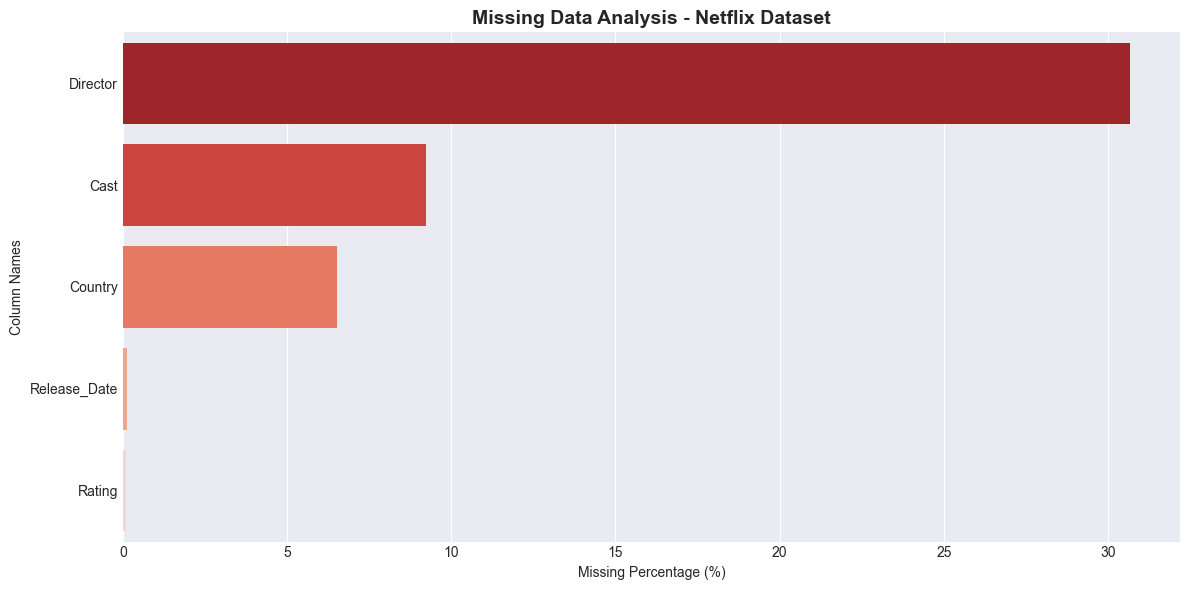

In [9]:
plt.figure(figsize=(12, 6))
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]
sns.barplot(x=missing_pct.values, y=missing_pct.index, palette='Reds_r')
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Column Names')
plt.title('Missing Data Analysis - Netflix Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Data Cleaning and Preprocessing

In [10]:
df_clean = df.copy()

In [11]:
print("Unique Values in Key Columns:")

print(f"Category (Type): {df_clean['Category'].unique()}")
print(f"Number of unique titles: {df_clean['Title'].nunique()}")
print(f"Number of unique countries: {df_clean['Country'].nunique()}")
print(f"Number of unique ratings: {df_clean['Rating'].nunique()}")

Unique Values in Key Columns:
Category (Type): ['TV Show' 'Movie']
Number of unique titles: 7787
Number of unique countries: 681
Number of unique ratings: 14


In [12]:
df_clean['Release_Date'] = pd.to_datetime(df_clean['Release_Date'], errors='coerce')
df_clean['Release_Year'] = df_clean['Release_Date'].dt.year
df_clean['Release_Month'] = df_clean['Release_Date'].dt.month

In [13]:
print(f"Year Range: {df_clean['Release_Year'].min():.0f} - {df_clean['Release_Year'].max():.0f}")
print(f"Total Years Covered: {df_clean['Release_Year'].nunique()}")

Year Range: 2008 - 2021
Total Years Covered: 14


In [14]:
print("\nHandling Missing Values:")

df_clean['Director'].fillna('Unknown', inplace=True)
df_clean['Cast'].fillna('Unknown', inplace=True)
df_clean['Country'].fillna('Unknown', inplace=True)
df_clean['Rating'].fillna('Not Rated', inplace=True)

print("Missing values handled successfully!")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")


Handling Missing Values:
Missing values handled successfully!
Remaining missing values: 294


In [18]:
df_clean.isna().sum()

Show_Id             0
Category            0
Title               0
Director            0
Cast                0
Country             0
Release_Date       98
Rating              0
Duration            0
Type                0
Description         0
Release_Year       98
Release_Month      98
Genre_List          0
Primary_Genre       0
Primary_Country     0
dtype: int64

In [19]:
df_clean.dropna(inplace=True)

In [20]:
df_clean.isna().sum()

Show_Id            0
Category           0
Title              0
Director           0
Cast               0
Country            0
Release_Date       0
Rating             0
Duration           0
Type               0
Description        0
Release_Year       0
Release_Month      0
Genre_List         0
Primary_Genre      0
Primary_Country    0
dtype: int64

In [15]:
df_clean['Genre_List'] = df_clean['Type'].str.split(',').apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else [])
df_clean['Primary_Genre'] = df_clean['Type'].str.split(',').str[0].str.strip()

In [16]:
df_clean['Primary_Country'] = df_clean['Country'].str.split(',').str[0].str.strip()

In [21]:
print("\nData preprocessing completed!")
print(f"Cleaned dataset shape: {df_clean.shape}")


Data preprocessing completed!
Cleaned dataset shape: (7691, 16)


## Exploratory Data Analysis

In [22]:
category_counts = df_clean['Category'].value_counts()
category_pct = (category_counts / len(df_clean) * 100).round(2)

print("Content Distribution:")

for cat, count in category_counts.items():
    pct = category_pct[cat]
    print(f"{cat:15s}: {count:5d} ({pct:5.2f}%)")

Content Distribution:
Movie          :  5379 (69.94%)
TV Show        :  2312 (30.06%)


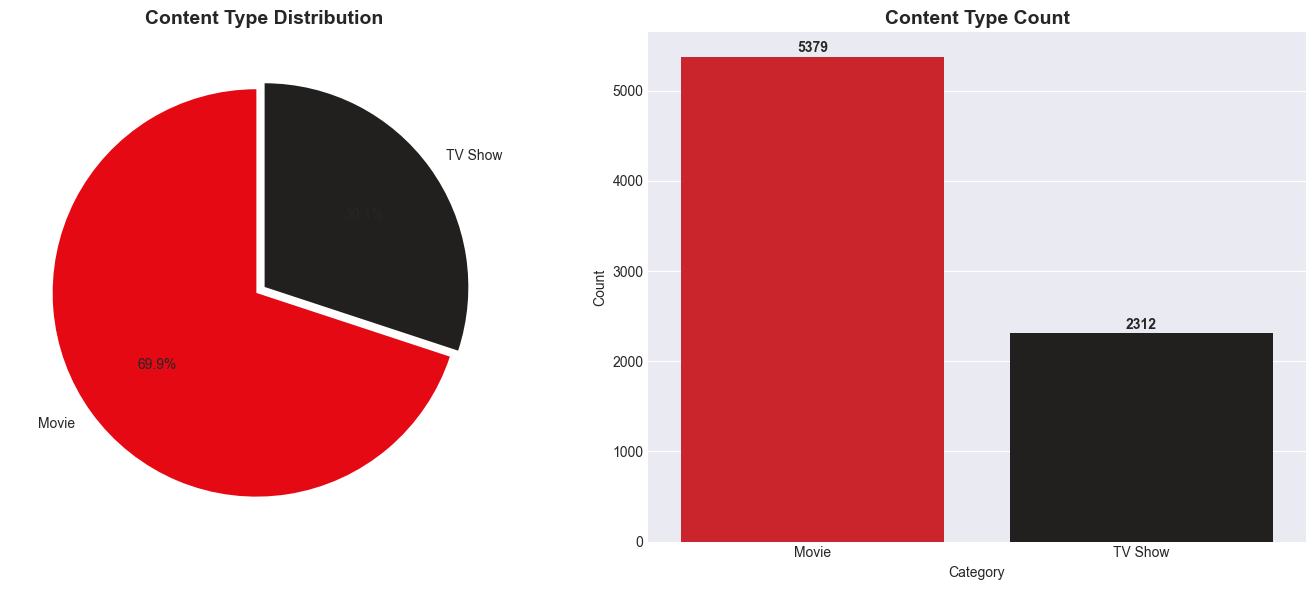

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['#E50914', '#221f1f']

axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=(0.05, 0))
axes[0].set_title('Content Type Distribution', fontsize=14, fontweight='bold')

sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors, ax=axes[1])
axes[1].set_title('Content Type Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
for i, v in enumerate(category_counts.values):
    axes[1].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [26]:
yearly_content = df_clean.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)
yearly_total = df_clean['Release_Year'].value_counts().sort_index()

print("\nContent Addition by Year (Last 10 Years):")
print(yearly_content.tail(10))


Content Addition by Year (Last 10 Years):
Category      Movie  TV Show
Release_Year                
2012.0            3        0
2013.0            6        4
2014.0           19        5
2015.0           58       21
2016.0          258      174
2017.0          864      337
2018.0         1255      406
2019.0         1498      639
2020.0         1313      696
2021.0           88       29


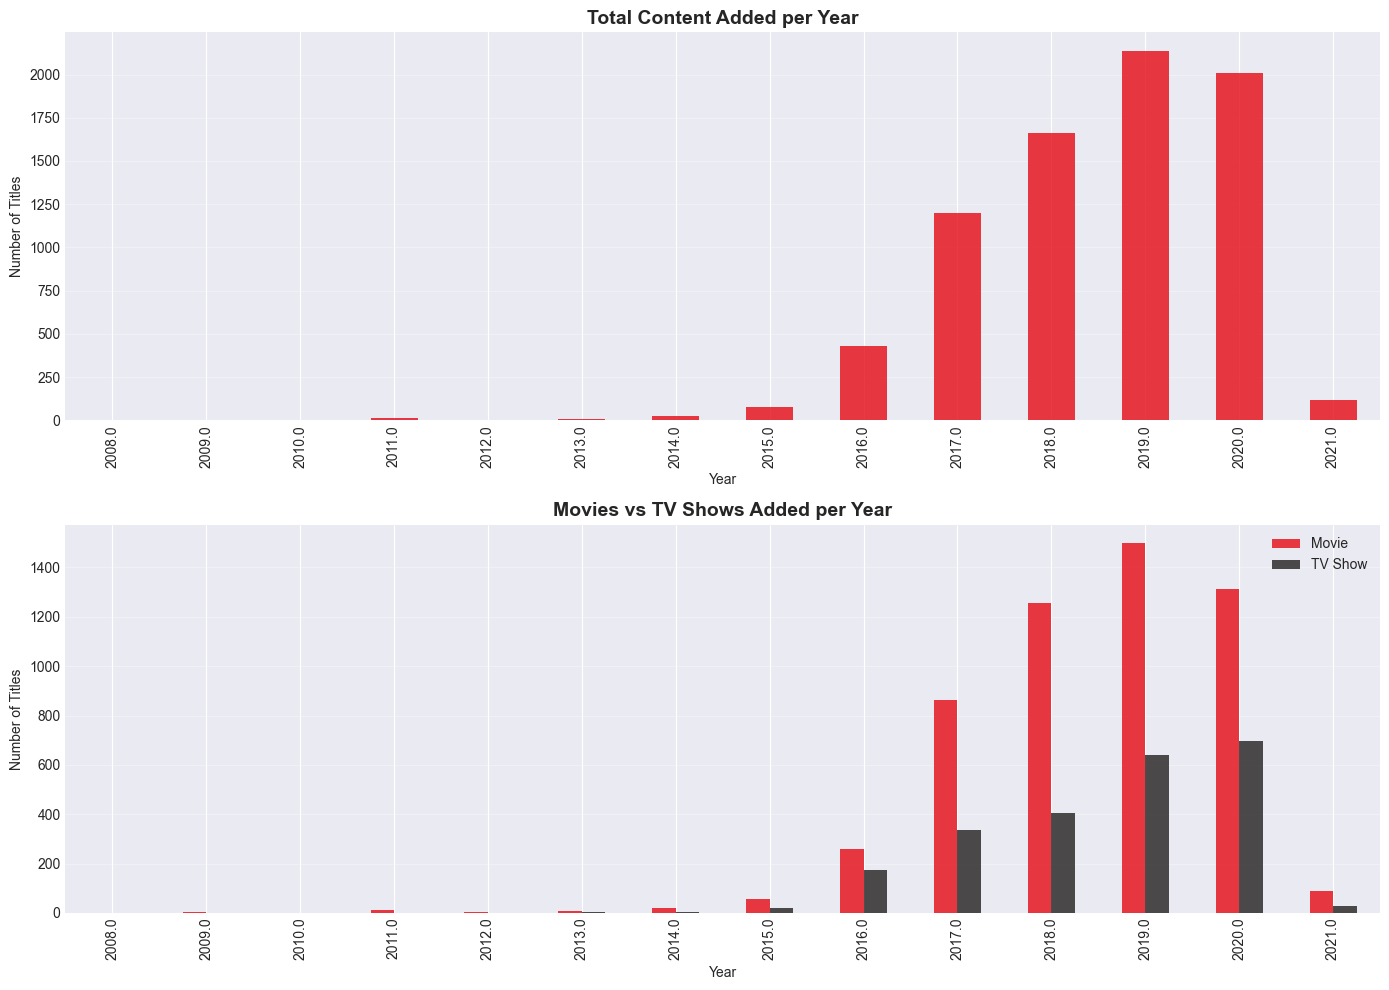

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

yearly_total.plot(kind='bar', ax=axes[0], color='#E50914', alpha=0.8)
axes[0].set_title('Total Content Added per Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Titles')
axes[0].grid(axis='y', alpha=0.3)

yearly_content.plot(kind='bar', ax=axes[1], color=['#E50914', '#221f1f'], alpha=0.8)
axes[1].set_title('Movies vs TV Shows Added per Year', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Titles')
axes[1].legend(['Movie', 'TV Show'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

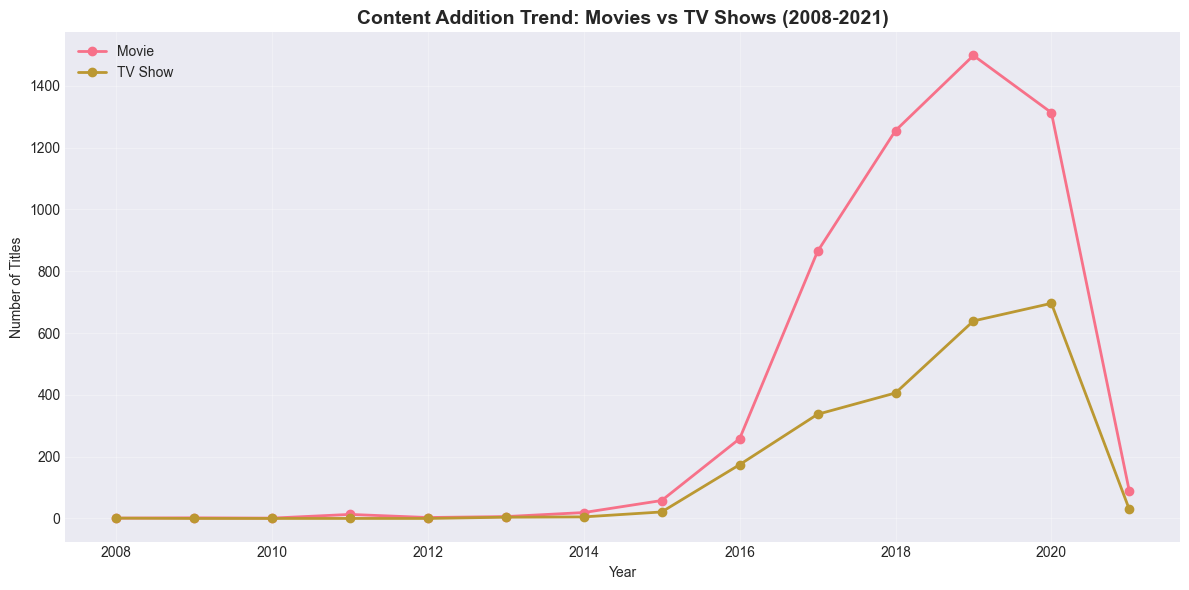

In [28]:
plt.figure(figsize=(14, 6))
yearly_content.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Content Addition Trend: Movies vs TV Shows (2008-2021)',
          fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(['Movie', 'TV Show'], loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
recent_5_years = df_clean[df_clean['Release_Year'] >= 2017]
print("\nContent Growth Analysis (Last 5 Years):")
print(f"Total content (2017-2021): {len(recent_5_years)}")
print(f"Movies: {len(recent_5_years[recent_5_years['Category'] == 'Movie'])}")
print(f"TV Shows: {len(recent_5_years[recent_5_years['Category'] == 'TV Show'])}")


Content Growth Analysis (Last 5 Years):
Total content (2017-2021): 7125
Movies: 5018
TV Shows: 2107


In [30]:
all_genres = []
for genres in df_clean['Genre_List']:
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts().head(20)

print("\nTop 20 Genres on Netflix:")
print(genre_counts)


Top 20 Genres on Netflix:
International Movies        2437
Dramas                      2108
Comedies                    1472
International TV Shows      1176
Documentaries                786
Action & Adventure           721
TV Dramas                    680
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  494
Thrillers                    492
Crime TV Shows               416
Kids' TV                     396
Docuseries                   338
Stand-Up Comedy              329
Romantic TV Shows            327
Music & Musicals             321
Horror Movies                312
Sci-Fi & Fantasy             218
Name: count, dtype: int64


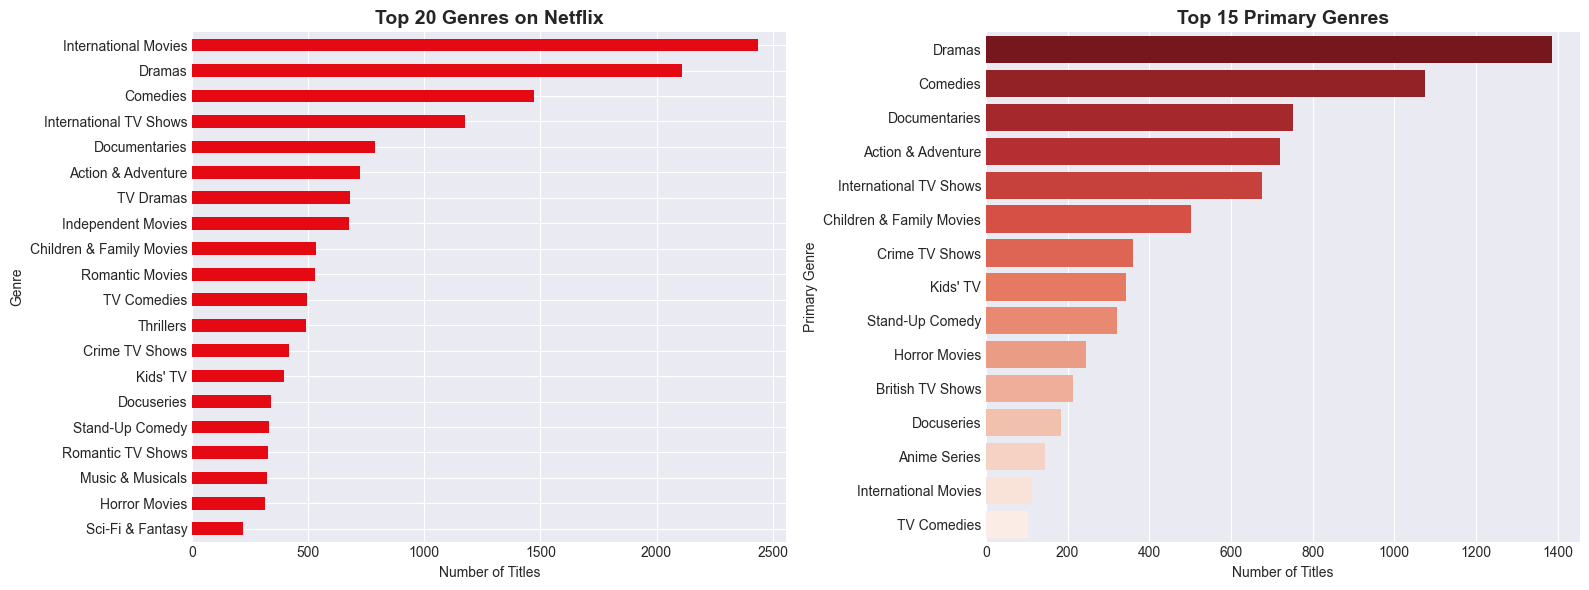

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

genre_counts.plot(kind='barh', ax=axes[0], color='#E50914')
axes[0].set_title('Top 20 Genres on Netflix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Genre')
axes[0].invert_yaxis()

primary_genre_counts = df_clean['Primary_Genre'].value_counts().head(15)
sns.barplot(y=primary_genre_counts.index, x=primary_genre_counts.values,
            palette='Reds_r', ax=axes[1])
axes[1].set_title('Top 15 Primary Genres', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('Primary Genre')

plt.tight_layout()
plt.show()

In [32]:
print("\nTop 10 Genres by Content Type:")

movie_genres = []
tv_genres = []

for idx, row in df_clean.iterrows():
    if row['Category'] == 'Movie':
        movie_genres.extend(row['Genre_List'])
    else:
        tv_genres.extend(row['Genre_List'])

print("\nMovies - Top 10 Genres:")
movie_genre_counts = pd.Series(movie_genres).value_counts().head(10)
print(movie_genre_counts)

print("\nTV Shows - Top 10 Genres:")
tv_genre_counts = pd.Series(tv_genres).value_counts().head(10)
print(tv_genre_counts)



Top 10 Genres by Content Type:

Movies - Top 10 Genres:
International Movies        2437
Dramas                      2108
Comedies                    1472
Documentaries                786
Action & Adventure           721
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
Thrillers                    492
Stand-Up Comedy              329
Name: count, dtype: int64

TV Shows - Top 10 Genres:
International TV Shows    1176
TV Dramas                  680
TV Comedies                494
Crime TV Shows             416
Kids' TV                   396
Docuseries                 338
Romantic TV Shows          327
British TV Shows           214
Reality TV                 211
Korean TV Shows            146
Name: count, dtype: int64


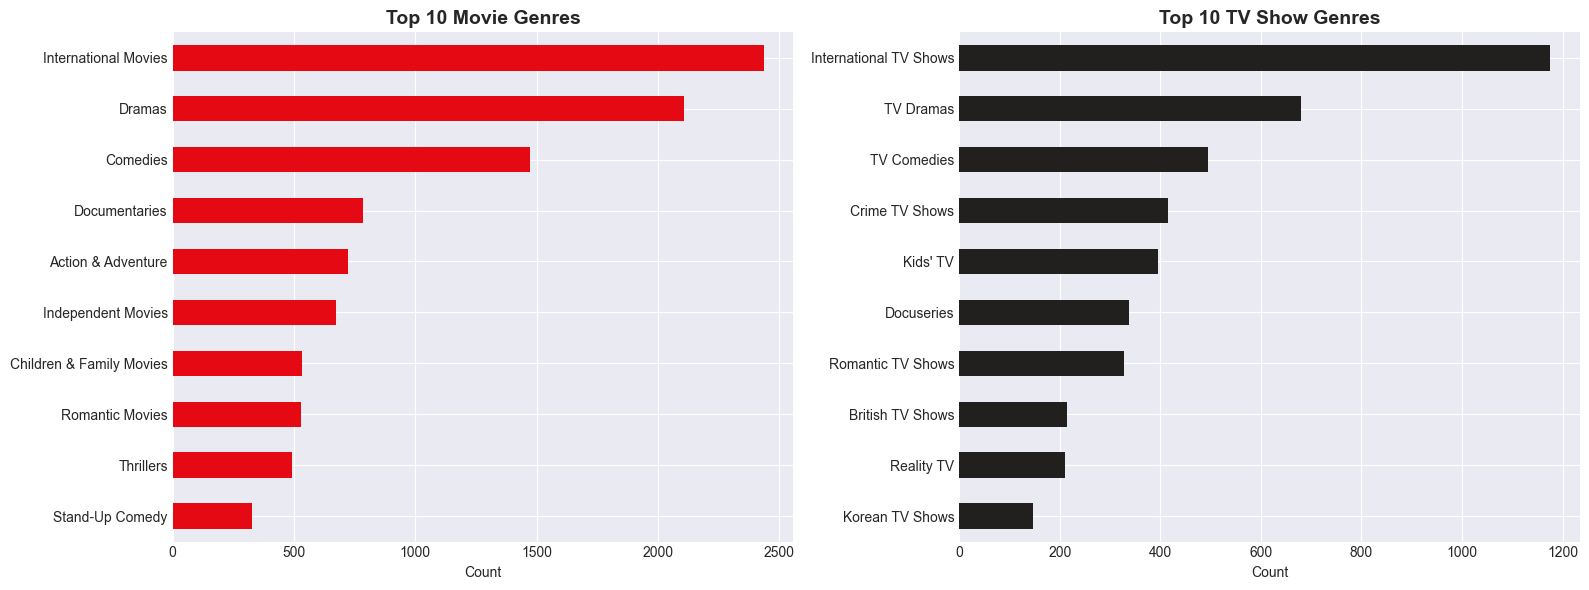

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

movie_genre_counts.plot(kind='barh', ax=axes[0], color='#E50914')
axes[0].set_title('Top 10 Movie Genres', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count')
axes[0].invert_yaxis()

tv_genre_counts.plot(kind='barh', ax=axes[1], color='#221f1f')
axes[1].set_title('Top 10 TV Show Genres', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Count')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [34]:
country_counts = df_clean['Primary_Country'].value_counts().head(20)

print("\nTop 20 Content Producing Countries:")
print(country_counts)


Top 20 Content Producing Countries:
Primary_Country
United States     2842
India              955
United Kingdom     560
Unknown            503
Canada             247
Japan              233
France             193
South Korea        189
Spain              164
Mexico             123
Turkey             106
Australia          106
Egypt              105
Germany             92
China               86
Taiwan              82
Brazil              79
Hong Kong           77
Indonesia           76
Philippines         75
Name: count, dtype: int64


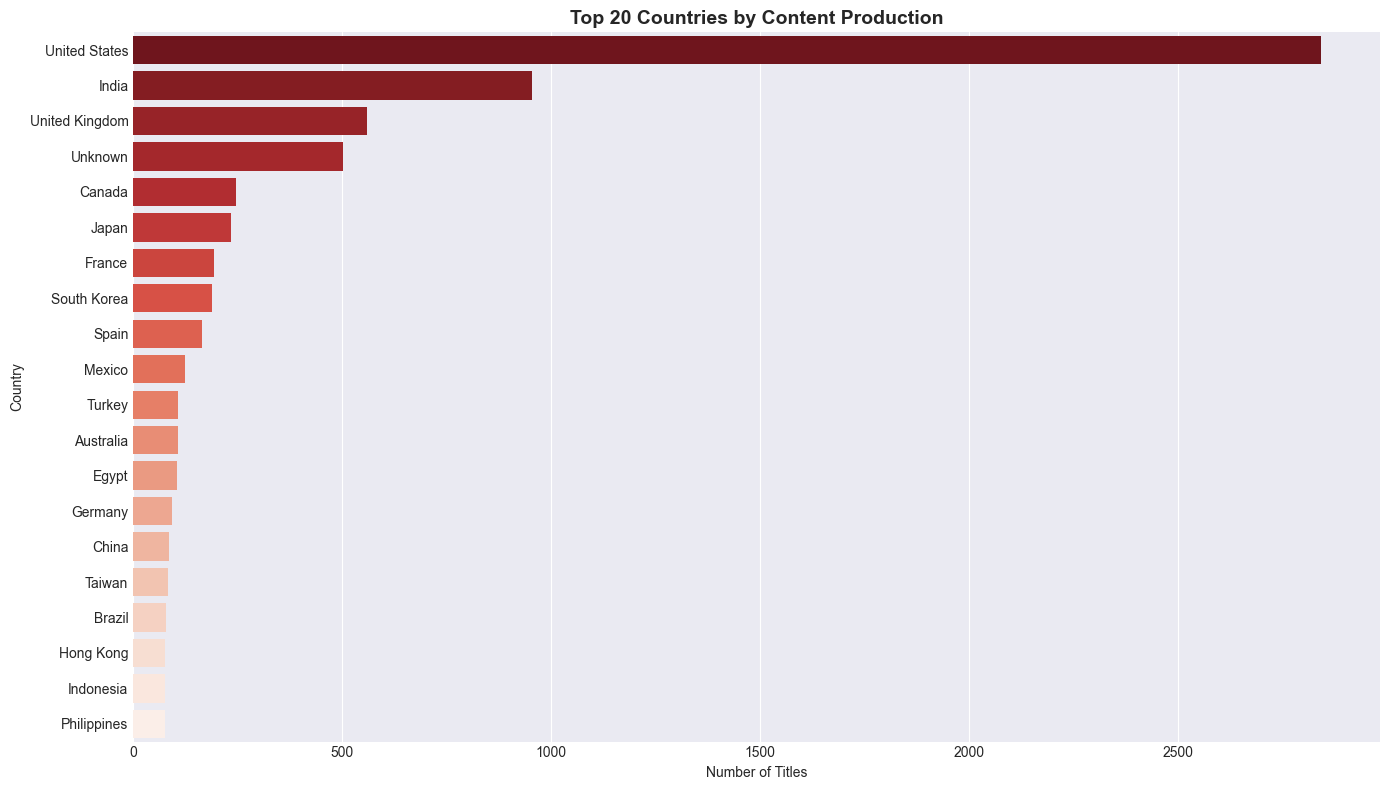

In [35]:
plt.figure(figsize=(14, 8))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='Reds_r')
plt.title('Top 20 Countries by Content Production', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [36]:
print("\nTop 10 Countries - Content Type Breakdown:")

top_countries = df_clean['Primary_Country'].value_counts().head(10).index
country_category = df_clean[df_clean['Primary_Country'].isin(top_countries)].groupby(
    ['Primary_Country', 'Category']).size().unstack(fill_value=0)

print(country_category)


Top 10 Countries - Content Type Breakdown:
Category         Movie  TV Show
Primary_Country                
Canada             175       72
France             137       56
India              883       72
Japan               75      158
Mexico              79       44
South Korea         42      147
Spain              119       45
United Kingdom     341      219
United States     2101      741
Unknown            230      273


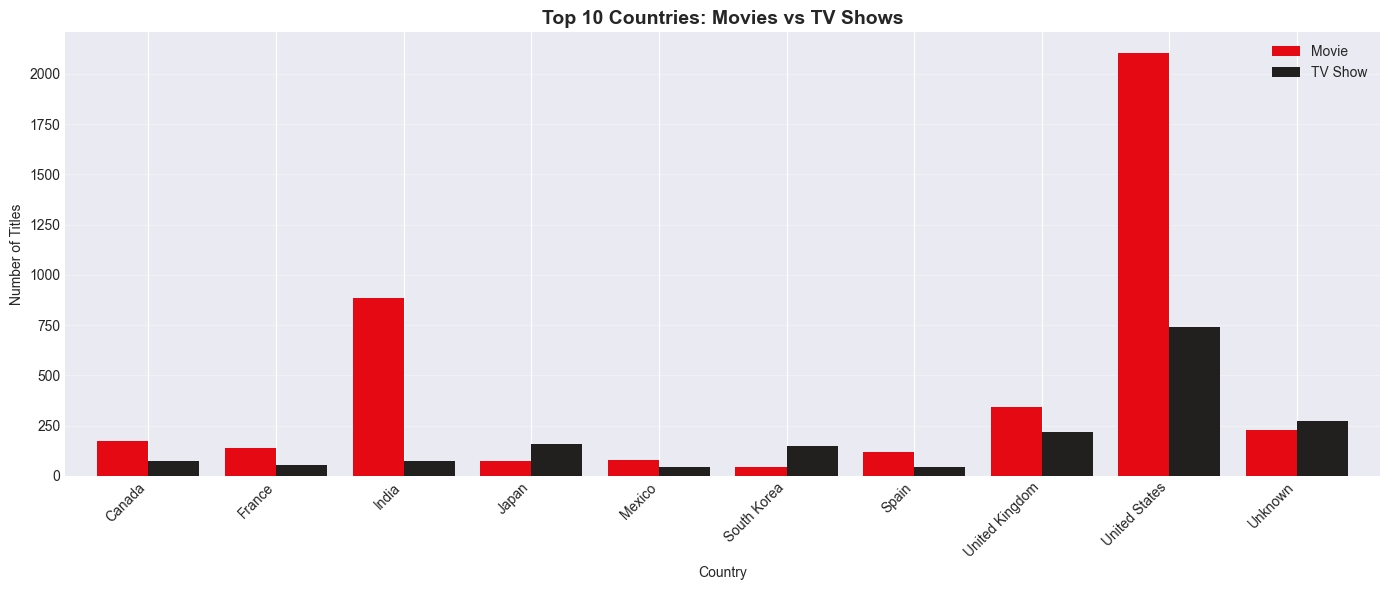

In [37]:
country_category.plot(kind='bar', figsize=(14, 6), color=['#E50914', '#221f1f'], width=0.8)
plt.title('Top 10 Countries: Movies vs TV Shows', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(['Movie', 'TV Show'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
rating_counts = df_clean['Rating'].value_counts()

print("\nContent Rating Distribution:")
print(rating_counts)


Content Rating Distribution:
Rating
TV-MA        2841
TV-14        1904
TV-PG         781
R             665
PG-13         386
TV-Y          273
TV-Y7         267
PG            247
TV-G          186
NR             82
G              39
Not Rated       7
TV-Y7-FV        5
UR              5
NC-17           3
Name: count, dtype: int64


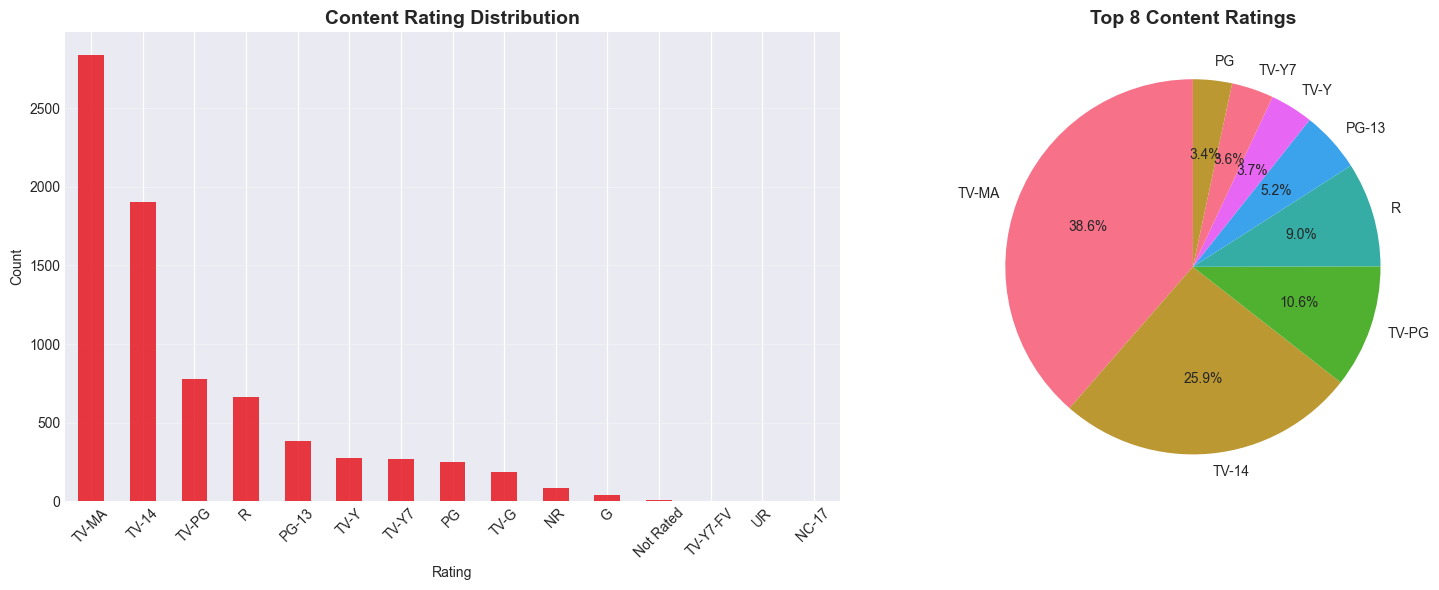

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

rating_counts.plot(kind='bar', ax=axes[0], color='#E50914', alpha=0.8)
axes[0].set_title('Content Rating Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

top_ratings = rating_counts.head(8)
axes[1].pie(top_ratings, labels=top_ratings.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Top 8 Content Ratings', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [40]:
df_movies = df_clean[df_clean['Category'] == 'Movie'].copy()
df_movies['Duration_Min'] = df_movies['Duration'].str.extract('(\d+)').astype(float)

df_tv = df_clean[df_clean['Category'] == 'TV Show'].copy()
df_tv['Seasons'] = df_tv['Duration'].str.extract('(\d+)').astype(float)

In [41]:
print("\nDuration Statistics:")
print("\nMovies (Minutes):")
print(df_movies['Duration_Min'].describe())
print("\nTV Shows (Seasons):")
print(df_tv['Seasons'].describe())


Duration Statistics:

Movies (Minutes):
count    5379.000000
mean       99.306563
std        28.525684
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: Duration_Min, dtype: float64

TV Shows (Seasons):
count    2312.000000
mean        1.691176
std         1.489252
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: Seasons, dtype: float64


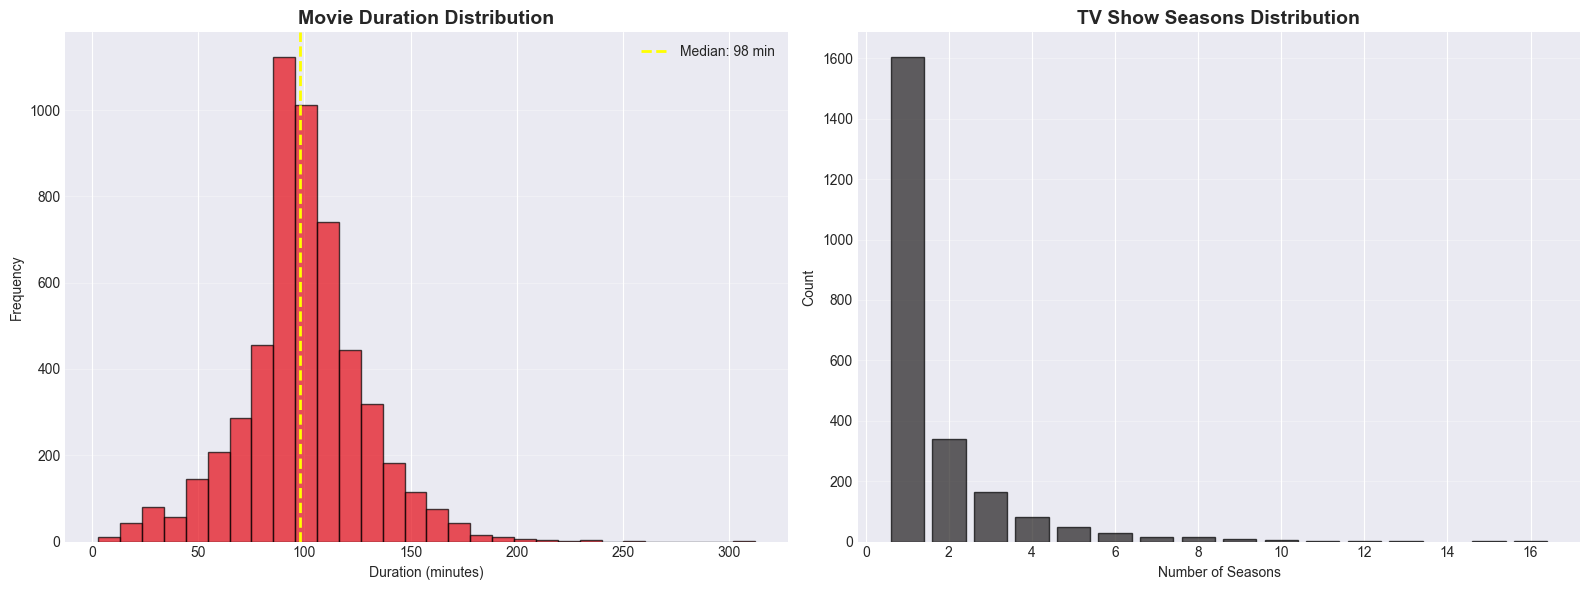

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df_movies['Duration_Min'].dropna(), bins=30, color='#E50914', alpha=0.7, edgecolor='black')
axes[0].axvline(df_movies['Duration_Min'].median(), color='yellow', linestyle='--',
                linewidth=2, label=f"Median: {df_movies['Duration_Min'].median():.0f} min")
axes[0].set_title('Movie Duration Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

season_counts = df_tv['Seasons'].value_counts().sort_index()
axes[1].bar(season_counts.index, season_counts.values, color='#221f1f', alpha=0.7, edgecolor='black')
axes[1].set_title('TV Show Seasons Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Seasons')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [43]:
monthly_additions = df_clean.groupby(['Release_Year', 'Release_Month']).size().reset_index(name='Count')
monthly_avg = df_clean.groupby('Release_Month').size()

In [44]:
print("\nMonthly Content Addition Pattern:")
print(monthly_avg.sort_values(ascending=False))


Monthly Content Addition Pattern:
Release_Month
12.0    817
10.0    780
1.0     746
11.0    730
3.0     661
9.0     615
8.0     612
4.0     597
7.0     592
6.0     538
5.0     537
2.0     466
dtype: int64


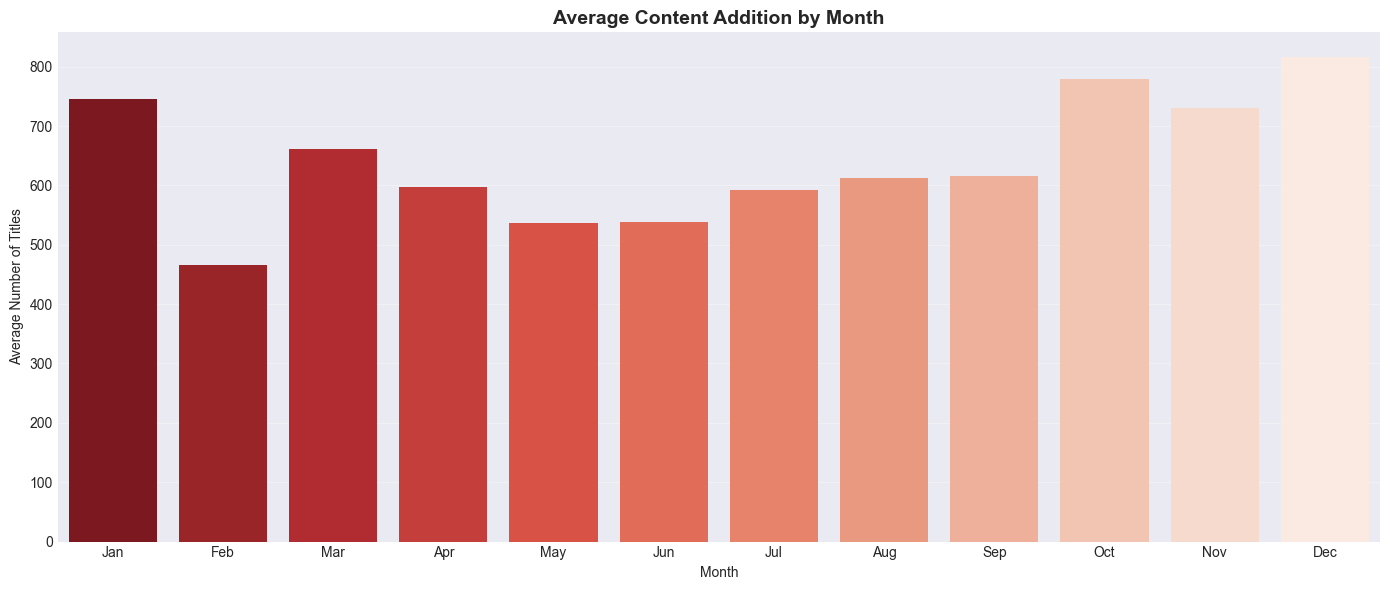

In [45]:
plt.figure(figsize=(14, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='Reds_r')
plt.title('Average Content Addition by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Number of Titles')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [46]:
recent_years = df_clean[df_clean['Release_Year'] >= 2015].copy()
top_5_genres = df_clean['Primary_Genre'].value_counts().head(5).index

genre_year_data = []
for year in sorted(recent_years['Release_Year'].unique()):
    year_data = recent_years[recent_years['Release_Year'] == year]
    for genre in top_5_genres:
        count = year_data[year_data['Primary_Genre'] == genre].shape[0]
        genre_year_data.append({'Year': year, 'Genre': genre, 'Count': count})

genre_evolution = pd.DataFrame(genre_year_data)

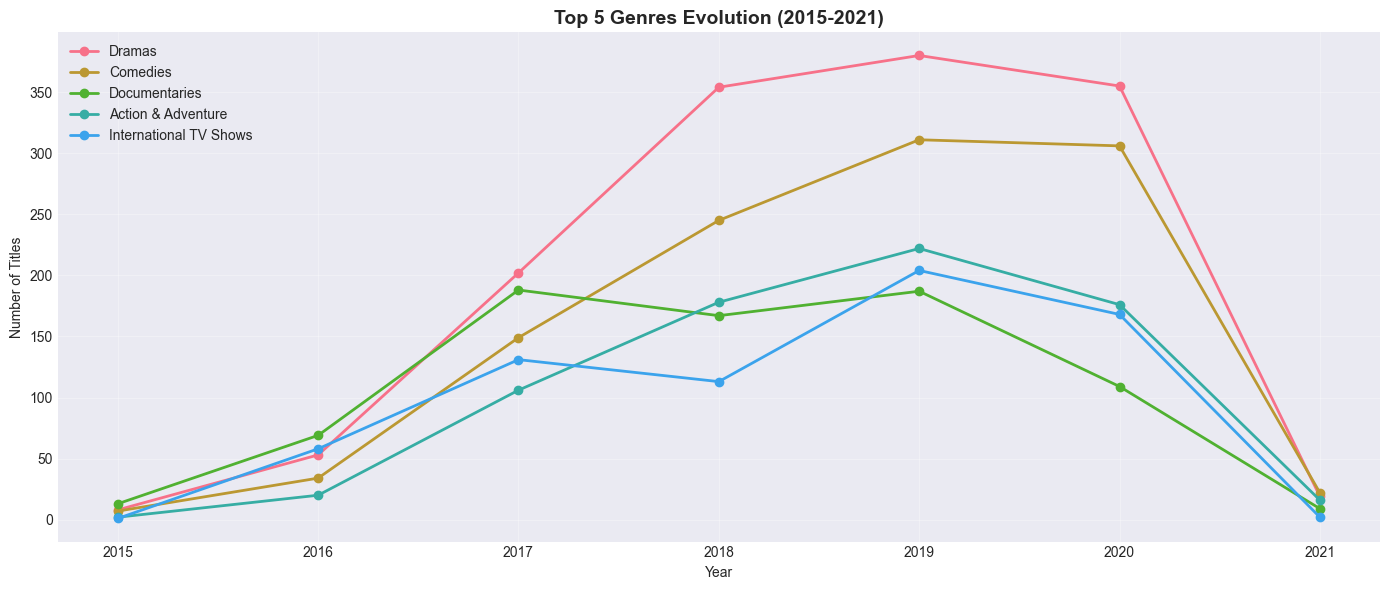

In [47]:
plt.figure(figsize=(14, 6))
for genre in top_5_genres:
    genre_data = genre_evolution[genre_evolution['Genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['Count'], marker='o', linewidth=2, label=genre)

plt.title('Top 5 Genres Evolution (2015-2021)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
print("="*70)
print("KEY INSIGHTS AND STRATEGIC RECOMMENDATIONS")
print("="*70)

print("\n1. CONTENT TYPE DISTRIBUTION:")
print("-" * 70)
movies_pct = (df_clean['Category'].value_counts()['Movie'] / len(df_clean) * 100)
tv_pct = (df_clean['Category'].value_counts()['TV Show'] / len(df_clean) * 100)
print(f"   • Movies dominate the catalog at {movies_pct:.1f}%")
print(f"   • TV Shows represent {tv_pct:.1f}% of content")
print(f"   • Recommendation: Balance content mix to meet diverse viewer preferences")

print("\n2. TEMPORAL TRENDS:")
print("-" * 70)
peak_year = yearly_total.idxmax()
peak_count = yearly_total.max()
print(f"   • Peak content addition year: {peak_year} ({peak_count} titles)")
recent_growth = ((yearly_total.iloc[-1] - yearly_total.iloc[-5]) / yearly_total.iloc[-5] * 100)
print(f"   • Growth trend shows strategic content expansion")
print(f"   • Recommendation: Maintain consistent content acquisition strategy")

print("\n3. GENRE INSIGHTS:")
print("-" * 70)
print(f"   • Top genre: {genre_counts.index[0]} ({genre_counts.iloc[0]} titles)")
print(f"   • Diverse genre portfolio with {len(genre_counts)} unique genres")
print(f"   • Recommendation: Invest in underrepresented but emerging genres")

print("\n4. GEOGRAPHIC DIVERSITY:")
print("-" * 70)
print(f"   • Leading content producer: {country_counts.index[0]} ({country_counts.iloc[0]} titles)")
print(f"   • Content from {df_clean['Primary_Country'].nunique()} different countries")
print(f"   • Recommendation: Expand local content from emerging markets")

print("\n5. CONTENT RATINGS:")
print("-" * 70)
top_rating = rating_counts.index[0]
print(f"   • Most common rating: {top_rating}")
print(f"   • Recommendation: Diversify content for all age demographics")

print("\n" + "="*70)
print("CONCLUSION: Netflix shows strong content diversity with opportunities")
print("for strategic expansion in TV shows and regional content.")
print("="*70)

KEY INSIGHTS AND STRATEGIC RECOMMENDATIONS

1. CONTENT TYPE DISTRIBUTION:
----------------------------------------------------------------------
   • Movies dominate the catalog at 69.9%
   • TV Shows represent 30.1% of content
   • Recommendation: Balance content mix to meet diverse viewer preferences

2. TEMPORAL TRENDS:
----------------------------------------------------------------------
   • Peak content addition year: 2019.0 (2137 titles)
   • Growth trend shows strategic content expansion
   • Recommendation: Maintain consistent content acquisition strategy

3. GENRE INSIGHTS:
----------------------------------------------------------------------
   • Top genre: International Movies (2437 titles)
   • Diverse genre portfolio with 20 unique genres
   • Recommendation: Invest in underrepresented but emerging genres

4. GEOGRAPHIC DIVERSITY:
----------------------------------------------------------------------
   • Leading content producer: United States (2842 titles)
   • Conten

In [49]:
summary_data = {
    'Metric': [
        'Total Titles',
        'Movies',
        'TV Shows',
        'Unique Genres',
        'Countries Represented',
        'Year Range',
        'Average Movie Duration (min)',
        'Most Common Rating',
        'Top Content Producer'
    ],
    'Value': [
        len(df_clean),
        len(df_clean[df_clean['Category'] == 'Movie']),
        len(df_clean[df_clean['Category'] == 'TV Show']),
        len(genre_counts),
        df_clean['Primary_Country'].nunique(),
        f"{df_clean['Release_Year'].min():.0f} - {df_clean['Release_Year'].max():.0f}",
        f"{df_movies['Duration_Min'].mean():.1f}",
        rating_counts.index[0],
        country_counts.index[0]
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*70)
print("NETFLIX DATASET - COMPREHENSIVE SUMMARY")
print("="*70)
print(summary_df.to_string(index=False))
print("="*70)


NETFLIX DATASET - COMPREHENSIVE SUMMARY
                      Metric         Value
                Total Titles          7691
                      Movies          5379
                    TV Shows          2312
               Unique Genres            20
       Countries Represented            82
                  Year Range   2008 - 2021
Average Movie Duration (min)          99.3
          Most Common Rating         TV-MA
        Top Content Producer United States
